## **Student GPA Prediction Project**

## **Introduction & Objective**
The objective of this project is to predict students' **College GPA** based on their academic and personal attributes.  
We will preprocess the dataset, perform exploratory data analysis (EDA), and apply the following models:
- Logistic Regression (for classification after binning GPA)
- Support Vector Regressor (SVR)
- Stochastic Gradient Descent (SGD Regressor)
- Multi-layer Perceptron (MLP Regressor)
- Decision Tree Regressor
- Evaluate models using MAE, MSE, and RMSE
- Compare performance through visualization and provide a conclusion.

## **Import Libraries & Load Dataset**
In this step:
- Import all necessary Python libraries for data analysis and machine learning.
- Load the dataset and inspect its structure and content.

## **Data Preprocessing**
Before training models, we need to clean the dataset and make it ready for modeling.

#### **Handle Missing Values**
- For numeric columns: Replace missing values with **mean**.
- For categorical columns: Replace missing values with **mode**.

#### **Encode Categorical Variables**
- Convert categorical features (e.g., `Major`, `Part-Time Job`) into numerical format using **Label Encoding**.

## **Exploratory Data Analysis (EDA)**
Understand data patterns and relationships between variables.

#### **GPA Distribution**
- Plot the distribution of `College GPA` to see how values are spread.

#### **Correlation Heatmap**
- Generate a correlation matrix and visualize it using a heatmap to identify relationships among variables.

## **Feature Scaling**
- Scale numeric features using **StandardScaler** to normalize the range of values for better model performance.

## **Model Building**
We will train the following models:

- **Logistic Regression** (for classification after converting GPA into categories: Low, Medium, High)
- **Support Vector Regressor (SVR)**
- **Stochastic Gradient Descent (SGD Regressor)**
- **Multi-layer Perceptron (MLP Regressor)**
- **Decision Tree Regressor**

## **Evaluation Metrics**
For regression models, we will use:
- **Mean Absolute Error (MAE)**: Average of absolute differences between predicted and actual values.
- **Mean Squared Error (MSE)**: Average of squared differences between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: Square root of MSE (shows error in original units).

For Logistic Regression (classification):
- Report **Accuracy Score**.

## **Compute MAE, MSE, RMSE**
- Calculate these metrics for each regression model on the test dataset.

## **Comparative Table**
- Create a table showing the MAE, MSE, and RMSE for each model for easy comparison.

## **Visualization of Model Performance**
- Plot a bar chart to visually compare the RMSE of all models.

## **Conclusion**
- Summarize key findings:
  - Logistic Regression accuracy.
  - Which regression model performed best based on RMSE.
  - Brief discussion on model performance and recommendations.


### **Step 1: Import Libraries and Load Dataset**
We will import all required Python libraries and load the dataset for analysis.
- Data handling (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning models (Logistic Regression, SVR, SGD, MLP, Decision Tree)
- Data preprocessing (scaling, encoding)
- Evaluation (MAE, MSE, RMSE)

Then we load the dataset (CSV file) into a pandas DataFrame so we can inspect and process it.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv("Academic.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (2000, 10)


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,Business,2.83,4,No,16.87,11.22,5.64,2.80
1,28.61,50.50,Business,3.26,1,No,6.53,7.79,5.78,2.55
2,24.11,73.79,NaN,3.56,3,No,17.04,8.09,7.10,2.77
3,21.80,85.44,Business,3.70,4,Yes,17.77,14.27,9.97,3.28
4,16.95,52.20,Arts,3.63,4,No,5.33,11.08,6.94,2.59


### **Step 2: Data Preprocessing - Handle Missing Values**

We are cleaning and preparing the raw dataset so it is suitable for modeling.
- For numerical columns, we replace missing values with the **mean** -> The mean keeps the central tendency of the data and is quick to compute. For large datasets (like 2,000 rows), it’s usually stable enough unless the distribution is very skewed.
- For categorical columns, we replace missing values with the **mode** -> Machine learning models can’t work with missing strings. The most common category is a reasonable default when we don’t know the missing value..
- Print `df.isnull().sum()` to confirm all zeros (no missing).
- If many values were missing in a column, make a note in your report (possible data quality issue).


In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


C:\Users\hp\AppData\Local\Temp\ipykernel_11816\4137798755.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Study Hours per Week            0
Attendance Rate                 0
Major                           0
High School GPA                 0
Extracurricular Activities      0
Part-Time Job                   0
Library Usage per Week          0
Online Coursework Engagement    0
Sleep Hours per Night           0
College GPA                     0
dtype: int64

## **Step 2.2: Encode Categorical Variables**

Convert categorical columns like `Major` (e.g., Science, Arts, Business…) and `Part-Time Job` (Yes/No) into numeric format using **Label Encoding**.
- Each unique category is mapped to an integer:
   - Example: Science → `3`, Business → `0`, Arts → `1`, etc. (actual mapping depends on data)
   - Yes/No becomes `1/0`.

- After encoding, print the DataFrame head to confirm that category names have become numbers.


> Label Encoding is fine when categories are **unordered** and when the model can handle arbitrary integer labels (tree-based models are fine; linear models may misinterpret ordering, but for this assignment Label Encoding is acceptable and simple).


In [20]:
from sklearn.preprocessing import LabelEncoder
le_major = LabelEncoder()
df['Major'] = le_major.fit_transform(df['Major'])
le_ptjob = LabelEncoder()
df['Part-Time Job'] = le_ptjob.fit_transform(df['Part-Time Job'])
df.head()


,Study Hours per Week,Attendance Rate,Major,High School GPA,Extracurricular Activities,Part-Time Job,Library Usage per Week,Online Coursework Engagement,Sleep Hours per Night,College GPA
0,21.95,79.64,1,2.83,4,0,16.87,11.22,5.64,2.80
1,28.61,50.50,1,3.26,1,0,6.53,7.79,5.78,2.55
2,24.11,73.79,3,3.56,3,0,17.04,8.09,7.10,2.77
3,21.80,85.44,1,3.70,4,1,17.77,14.27,9.97,3.28
4,16.95,52.20,0,3.63,4,0,5.33,11.08,6.94,2.59


## **Step 3: Exploratory Data Analysis - GPA Distribution**

We explore the dataset visually and statistically to understand:
- How GPA values are distributed
- Which features are related to GPA
- Whether there are outliers or unusual patterns


> Note: EDA helps guide modeling decisions:
> - Strong correlations may indicate useful predictors.
> - Low variance columns may add noise.
> - Skewed targets may require transformation (here we’ll inspect but not transform unless extreme).


### **Visuals in this step:**
1. `GPA Distribution Plot`
2. `Correlation Heatmap`

### **Step 3.1: GPA Distribution**

- A histogram (with optional KDE curve) of `College GPA` values across all students.
- Tells us if GPA is centered around a typical range (e.g., 2.5–3.5)
- Shows skewness (are most students high achievers? low?)
- Helps define bins for classification (Low / Medium / High) for Logistic Regression.

#### **Interpretation tips**
- If most values are between `2.5 and 3.5`, that justifies a `“Medium” class.`
- If values extend `near 4.0`, we know to include a `“High” category.`
- Very few low GPAs? Logistic model may have class imbalance issues (note in report).
  


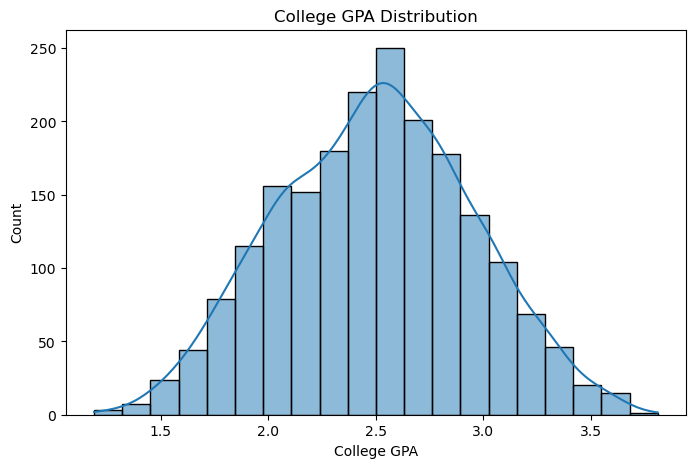

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['College GPA'], bins=20, kde=True)
plt.title("College GPA Distribution")
plt.show()


### **Step 3.2: Correlation Heatmap**

Computes pairwise Pearson correlation coefficients between all numeric features and visualizes them in a color grid.
- Features with **strong correlation to `College GPA`** may be good predictors.
- Features strongly correlated with each other may be redundant (multicollinearity).
- Helps us notice unexpected relationships (e.g., more study hours → higher GPA? more part‑time work → lower GPA?).

#### **How to read the heatmap**
- Values range from −1 to +1.
  - +1 = strong positive relationship
  - −1 = strong negative relationship
  - 0 = no linear relationship
- Look at the row/column for `College GPA` to see which features matter most.

> Note: Correlation does **not** prove causation. Use this only to inform modeling.


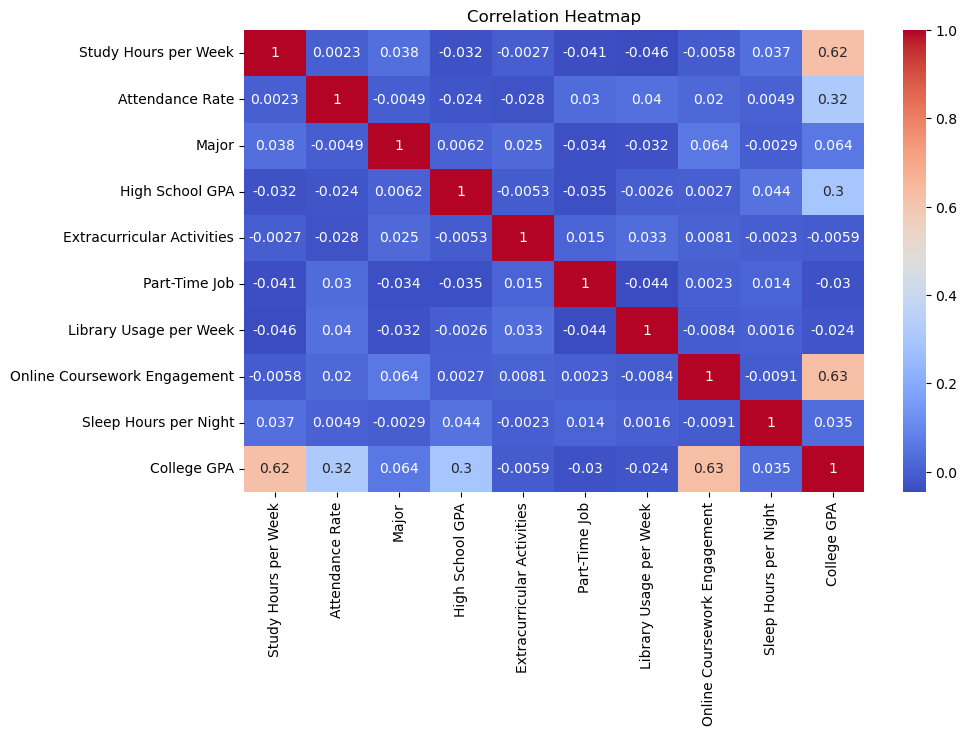

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Step 4: Prepare Features and Split Data**

Separate features (X) and target variable (y), then split into training and testing sets.

> - print X_train
> - print X_test
> -  print y_train
> -  print y_test

In [14]:
X = df.drop(columns=['College GPA'])
y = df['College GPA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of Train/Test Sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of Train/Test Sets:
X_train: (1600, 9)
X_test: (400, 9)
y_train: (1600,)
y_test: (400,)


## **Step 5: Feature Scaling**

We standardize the features using **StandardScaler** for better model performance so that all numeric values are on a similar scale (mean = 0, standard deviation = 1).

- Use `StandardScaler` from scikit-learn:
  - Fit on training data only (to avoid data leakage)
  - Transform both train and test using the training statistics

> **Why scale**
Some models (SVR, SGD, MLP) are sensitive to feature scale. If one feature has values like 0–100 and another 0–5, the large‑scale feature can dominate learning. Scaling improves:
>- Model convergence speed
> - Training stability
> - Performance consistency

### **What to check**
- Shapes of `X_train_scaled` and `X_test_scaled` should match original feature counts.
- Scaling does not change `y`; only the feature matrix is scaled.


In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (1600, 9)
X_test_scaled shape: (400, 9)


## **Step 6: Model Building and Evaluation**

We train 5 models as required by the assignment:

| Model | Type | Target Used | Notes |
|---|---|---|---|
| Logistic Regression | Classification | Binned GPA (Low/Med/High) | GPA converted to categories |
| SVR | Regression | Numeric GPA | Sensitive to scaling |
| SGD Regressor | Regression | Numeric GPA | Linear model trained with gradient descent |
| MLP Regressor | Regression | Numeric GPA | Neural network; may need tuning |
| Decision Tree Regressor | Regression | Numeric GPA | Handles nonlinearity; no scaling required but OK if scaled |

Each model is trained on the **training set** and evaluated on the **test set**.

### **Why this mix**
Your assignment explicitly includes both a classification model (Logistic Regression) and regression models. To remain faithful:
- We treat GPA as categories only for Logistic Regression.
- We keep GPA continuous for all regression models used in error metric calculations.


## **Step 6.1: Logistic Regression (Classification)**

Use Logistic Regression to classify students into GPA categories:
- **0 = Low** (GPA ≤ 2.5)
- **1 = Medium** (2.5 < GPA ≤ 3.5)
- **2 = High** (GPA > 3.5)

> **Why classify**
Logistic Regression predicts discrete classes, not continuous values. Since the assignment includes it by name, we bin GPA into ordered categories and use Logistic Regression to predict which group a student belongs to.

#### **Workflow**
1. Define a function to map numeric GPA to class labels.
2. Create new target arrays (`y_class_train`, `y_class_test`).
3. Train Logistic Regression on scaled features.
4. Evaluate using **accuracy score** (percentage of correct class predictions).

#### **Interpretation**
- High accuracy: Model separates GPA categories reasonably well.
- Low accuracy: Features may not distinguish GPA levels clearly; classes may overlap.

> Bonus (optional in write‑up): Show a confusion matrix to see which classes get confused.


In [17]:
def categorize_gpa(gpa):
    if gpa <= 2.5:
        return 0 
    elif gpa <= 3.5:
        return 1  
    else:
        return 2  

y_class = y.apply(categorize_gpa)
y_class_train = y_class.loc[y_train.index]
y_class_test = y_class.loc[y_test.index]

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_class_train)

log_accuracy = log_model.score(X_test_scaled, y_class_test)
print("Logistic Regression Classification Accuracy:", log_accuracy)


Logistic Regression Classification Accuracy: 0.975


### **Step 6.2: Confusion Matrix for Logistic Regression**

After training the Logistic Regression model for GPA classification (Low, Medium, High), we evaluate its performance using a **Confusion Matrix**.  
- **Rows:** Actual classes (true labels)
- **Columns:** Predicted classes
- **Diagonal values:** Correct predictions
- **Off-diagonal values:** Misclassifications
- **Interpretation:** Diagonal values = correctly classified samples; off-diagonal = misclassifications.

For our GPA classification:
- **Classes:** Low (0), Medium (1), High (2)
- A perfect classifier would have all counts on the diagonal.

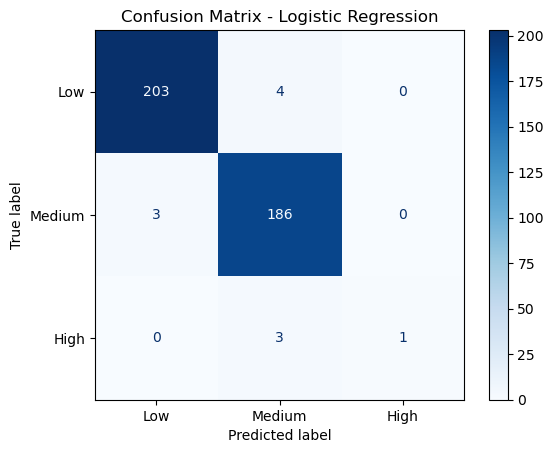

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_class_pred = log_model.predict(X_test_scaled)
cm = confusion_matrix(y_class_test, y_class_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## **Step 7: Evaluation Metrics**

We will evaluate regression model(SVR, SGD Regressor, MLP Regressor, and Decision Tree Regressors) using three standard error metrics:

#### **Mean Absolute Error (MAE)**
Average absolute difference between predicted and actual GPA.  
Formula: MAE = (1/n) Σ |yᵢ − ŷᵢ|  
**Interpretation:** On average, how far off (in GPA points) are our predictions?

#### **Mean Squared Error (MSE)**
Average of squared differences between predicted and actual GPA.  
Formula: MSE = (1/n) Σ (yᵢ − ŷᵢ)²  
**Interpretation:** Penalizes large errors more than MAE.

#### **Root Mean Squared Error (RMSE)**
Square root of MSE.  
Formula: RMSE = √MSE  
**Interpretation:** Error in original GPA units; easier to understand than MSE.

> Lower values are better for all three metrics. RMSE is most commonly reported in regression comparisons.


In [24]:
models = {
    "SVR": SVR(),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "MLPRegressor": MLPRegressor(max_iter=500, random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    results.append({"Model": name, "MAE": mae, "MSE": mse, "RMSE": rmse})
results_df = pd.DataFrame(results)
print("Model Performance Table:")
display(results_df)


Model Performance Table:


,Model,MAE,MSE,RMSE
0,SVR,0.059179,0.006357,0.079729
1,SGDRegressor,0.019078,0.002948,0.054297
2,MLPRegressor,0.088382,0.013092,0.114419
3,DecisionTreeRegressor,0.112500,0.023379,0.152902


## **Step 8: Visualization of Model Performance**

- Create a bar chart comparing the **RMSE** of all regression models.
- Tables are good for detail, but plots make trends easy to see. Your instructor can instantly spot which model is best.

### **Interpretation**
- `Shorter bar = lower RMSE = better predictive performance.`
- If differences are small, models are performing similarly; note that in the conclusion.


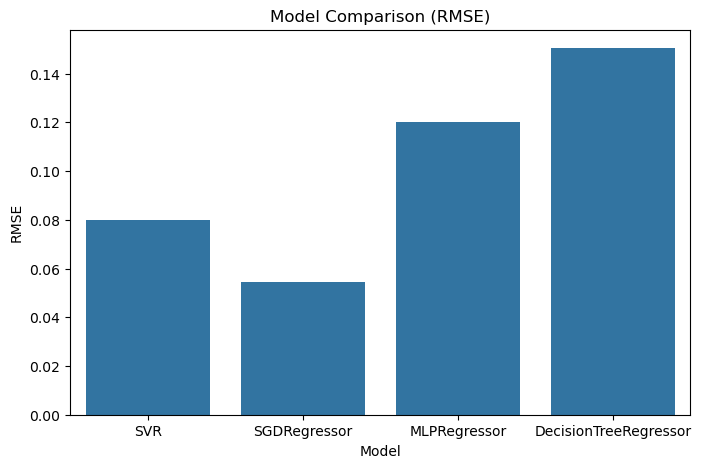

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=results_df)
plt.title("Model Comparison (RMSE)")
plt.show()


### **Step 9: Conclusion**
**1.**  **Logistic Regression (Classification)**
  - **`Accuracy = 97.5%`**, which is excellent for categorizing GPA into Low, Medium, High groups.
  - This means the classification model predicts GPA category almost perfectly.

**2.** **Regression Models (for actual GPA prediction)**
  - SGD Regressor performed the best with the lowest error:
       - `MAE: 0.019 (lowest)`
       - `RMSE: 0.054 (lowest)`
  - SVR is the second-best performer with RMSE = 0.079.
  - MLP Regressor and Decision Tree Regressor have higher errors, especially Decision Tree (worst with RMSE = 0.150).

**3.** **Comparison Visualization**
  - The bar chart clearly shows SGD Regressor is the most accurate (lowest RMSE).

### **Note:**
- If you want to predict GPA as a continuous value, choose SGD Regressor because it gives the smallest prediction error.
- If you want to classify GPA into categories, Logistic Regression is a very strong choice with 97.5% accuracy.
